## Handling Missing Values by the complete case analysis (CCA)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
cols = [x for x in df.columns if df[x].isnull().mean()<0.05 and df[x].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [6]:
df[cols].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [7]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [8]:
df_new=df[cols].dropna()

In [9]:
df_new.isnull().sum()

city_development_index    0
enrolled_university       0
education_level           0
experience                0
training_hours            0
dtype: int64

In [10]:
df_new.sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
15377,0.743,Part time course,Graduate,4.0,334.0
734,0.939,Full time course,High School,2.0,30.0
14597,0.895,no_enrollment,Graduate,20.0,152.0
14721,0.920,no_enrollment,Graduate,5.0,55.0
17000,0.910,no_enrollment,Graduate,20.0,135.0


array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

<Figure size 1000x600 with 0 Axes>

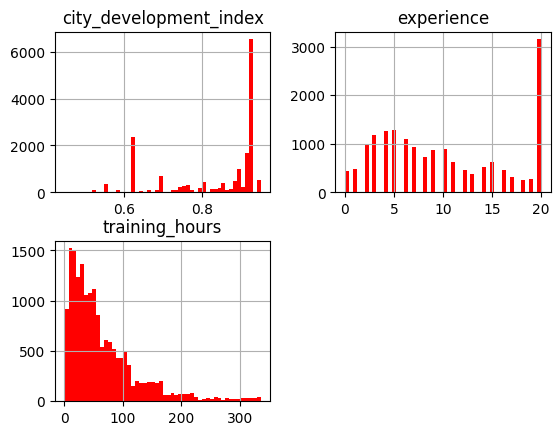

In [11]:
plt.figure(figsize=(10,6))
df_new.hist(bins=50, color='red')

<Axes: >

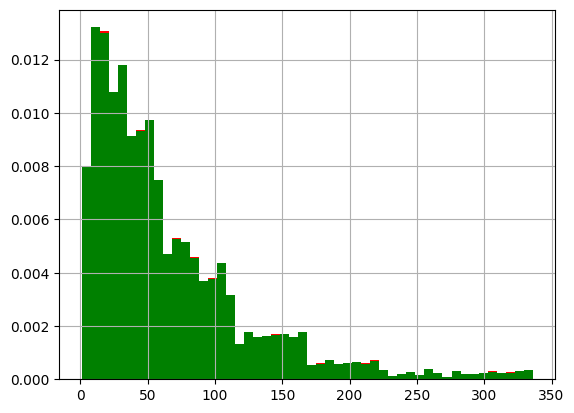

In [12]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['training_hours'].hist(bins=50,ax=ax, density=True,color='red')
df_new['training_hours'].hist(bins=50, ax=ax, density=True, color='green')

In [15]:
df_new.sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
2468,0.920,no_enrollment,Graduate,20.0,127.0
8135,0.890,no_enrollment,Graduate,20.0,86.0
16094,0.910,Full time course,High School,6.0,51.0
8809,0.887,no_enrollment,Graduate,20.0,21.0
13251,0.558,no_enrollment,Graduate,9.0,96.0


<Axes: >

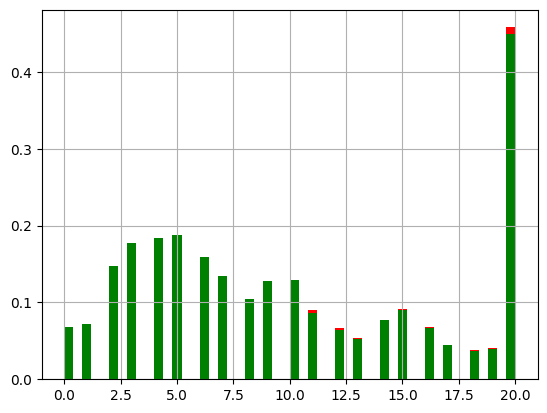

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)
df_new['experience'].hist(bins=50, color='red', ax=ax ,density=True)
df['experience'].hist(bins=50, density =True, ax=ax, color='green')


Text(0, 0.5, 'density ')

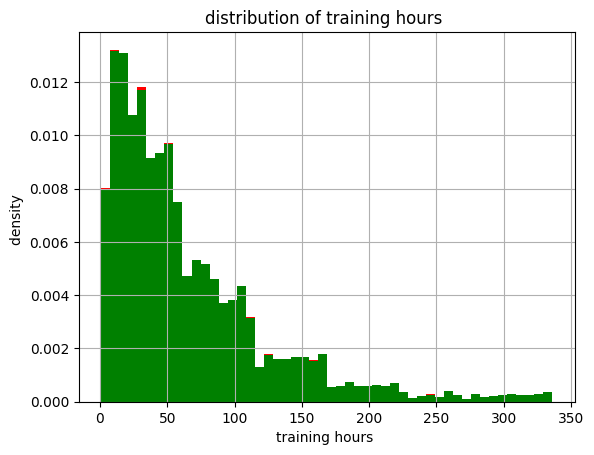

In [26]:
fig=plt.figure()
ax=fig.add_subplot(111)
df_new['training_hours'].hist(bins=50, color='red', ax=ax ,density=True)
df['training_hours'].hist(bins=50, density =True, ax=ax, color='green')
ax.set_title('distribution of training hours ')
plt.xlabel('training hours ')
plt.ylabel('density ')

In [32]:
df_new['enrolled_university'].value_counts()

enrolled_university
no_enrollment       12632
Full time course     3449
Part time course     1101
Name: count, dtype: int64

## checking for the categorical values 

In [33]:
temp=pd.concat([
    df['enrolled_university'].value_counts() / len(df),
    df_new['enrolled_university'].value_counts() / len(df_new)],axis=1
)

temp.columns = ['originl', 'CCA']


In [34]:
temp

,originl,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


- the ratio  in the categorical column should not be change as the original value provided 